In [5]:
import sys
sys.executable


'C:\\Users\\kiran\\Anaconda3\\envs\\tensorflow\\python.exe'

In [7]:
from IPython.display import display

In [10]:
import pandas as pd
import keras

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
train_df=pd.read_csv("data/train.csv")
train_df.head()
#SibSp-sibling and spouse, Parch- ,Embarked-starting of port , Parch- Parent and child

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df=pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_df.info() #total count of rows, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
#
to_drop=["PassengerId","Name","Ticket","Cabin","Fare"]

In [17]:
train2=train_df.drop(to_drop,axis=1)
test2=test_df.drop(to_drop,axis=1)

In [18]:
train2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [20]:
test2.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S


In [21]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [ ]:
#we need to complete data 
#we need  to complete data

In [23]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [24]:
#complete Embarked
#use mode to fill up data.. 
train2[train2["Embarked"].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [25]:
#fill with highest embarked
#.mode() gives series, index 0 and value S 
train2["Embarked"].mode()

0    S
dtype: object

In [27]:
most_embarked=train2["Embarked"].mode()[0]
most_embarked

'S'

In [30]:
#filling not available with most_embarked
train2["Embarked"] = train2["Embarked"].fillna(most_embarked)

In [31]:
train2[train2["Embarked"].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [19]:
#correlation plot
def show_corr(df):
    _, ax = plt.subplots(figsize=(8,6))

    # Colormap : Colors to denote correlation values
    cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

    # Plotting heatmap using seaborn
    sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)
    
#correlation:
# for x=1,2,3,4  and y=2,3,4, 5 is positive correlation as for increase in x there is increase in y by 1


In [48]:
def fill_age(df):
    #Iterate over sex features
    for s in ["male","female"]:
        for c in [1,2,3]:
            truth_table=(df["Sex"]==s)& (df["Pclass"]==c)
            #print(truth_table)
            temp_df=df[truth_table]["Age"].dropna()
            median_age=temp_df.median()
            print(s,c, median_age)
            df.loc[(df.Age.isnull())&(df.Sex==s)&(df.Pclass==c),"Age"]=median_age

In [52]:
print("this is for train2 \n")
fill_age(train2)
print("this is for test2 \n")
fill_age(test2)


this is for train2 

male 1 40.0
male 2 30.0
male 3 25.0
female 1 35.0
female 2 28.0
female 3 21.5
this is for test2 

male 1 42.0
male 2 28.0
male 3 24.0
female 1 41.0
female 2 24.0
female 3 22.0


In [54]:
def show_corr(df):
    _, ax = plt.subplots(figsize=(8,6))

    # Colormap : Colors to denote correlation values
    cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

    # Plotting heatmap using seaborn
    sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)

In [55]:
show_corr(train1) #we need to add  %matplotlib inline

NameError: name 'train1' is not defined

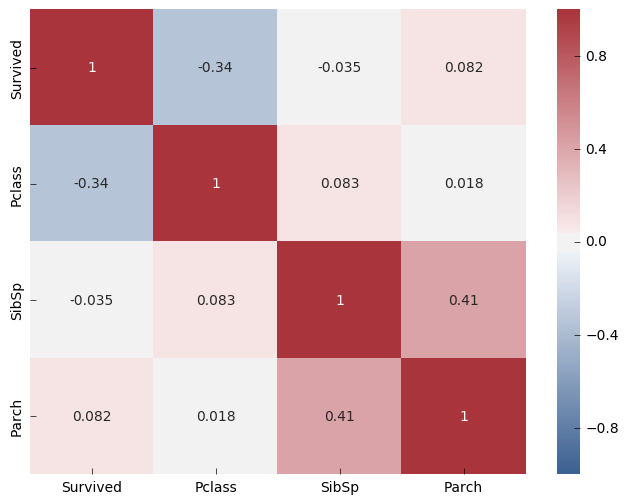

In [22]:
show_corr(train1) #we need to add  %matplotlib inline

In [57]:
#convert features to numerical

num_mapper = {
                "Embarked" : {'C' : 1, 'S': 2, 'Q' : 3},
                "Sex"      : {'male' : 1, 'female': 2},
            } #as female as more correlation than male, female has high value, 
train2 = train2.replace(num_mapper)
test2 = test2.replace(num_mapper)
#label encodding

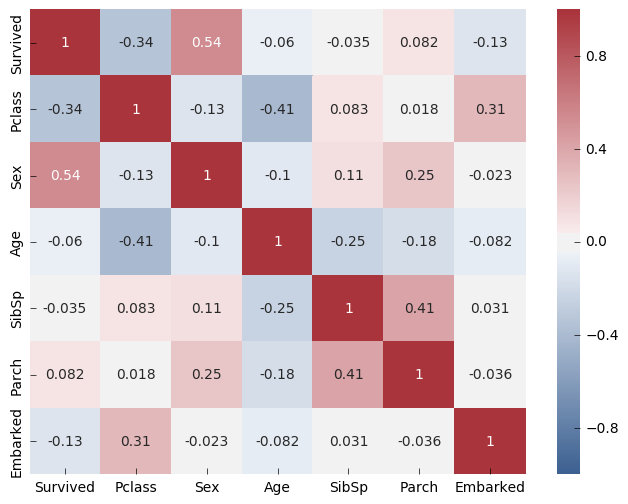

In [58]:
show_corr(train2)

In [59]:
train2_x=train2.drop(["Survived"],axis=1)
train2_x.tail()

,Pclass,Sex,Age,SibSp,Parch,Embarked
886,2,1,27.0,0,0,2
887,1,2,19.0,0,0,2
888,3,2,21.5,1,2,2
889,1,1,26.0,0,0,1
890,3,1,32.0,0,0,3


In [61]:
train2_y=train2["Survived"]
train2.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,1,27.0,0,0,2
887,1,1,2,19.0,0,0,2
888,0,3,2,21.5,1,2,2
889,1,1,1,26.0,0,0,1
890,0,3,1,32.0,0,0,3


In [62]:
#importing classifier
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state = 12)
clf_rf.fit(train2_x, train2_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=12,
            verbose=0, warm_start=False)

In [63]:
clf_rf.score(train2_x, train2_y)

0.92592592592592593

In [66]:
def kgl_submit_csv(df, predictions, savename = "my_predictions.csv", save=False):
    print("Number of predictions:", len(predictions))
    print("Number of passengers", len(df["PassengerId"]))
    
    kgl_df = pd.DataFrame({
        "PassengerId" : df["PassengerId"],
        "Survived" : predictions
    })
    
    if save:
        kgl_df.to_csv(savename, index=False)
    
    return kgl_df

In [67]:
predictions2 = clf_rf.predict(test2)

In [68]:
a = kgl_submit_csv(test_df, predictions2, savename= "pred2.csv", save=True)

Number of predictions: 418
Number of passengers 418


In [69]:
#-------keras
from keras.models import Sequential
from keras.layers import Dense



In [71]:
trainx=train2_x.values #keras takes value
trainx #its a frame

array([[  3. ,   1. ,  22. ,   1. ,   0. ,   2. ],
       [  1. ,   2. ,  38. ,   1. ,   0. ,   1. ],
       [  3. ,   2. ,  26. ,   0. ,   0. ,   2. ],
       ..., 
       [  3. ,   2. ,  21.5,   1. ,   2. ,   2. ],
       [  1. ,   1. ,  26. ,   0. ,   0. ,   1. ],
       [  3. ,   1. ,  32. ,   0. ,   0. ,   3. ]])

In [74]:
trainy=train2_y.values
trainy #its a series

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [75]:
#create model
model=Sequential()
#as we have 6 features
model.add(Dense(8,input_dim=6, activation='relu')) 
#adam is advance version of gradient version
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [79]:
history_object=model.fit(trainx,trainy,epochs=40,
                        batch_size=40, verbose=2, validation_split=0.1,
                        shuffle=False)

#epoch makes weight value more good, n loss are minimized


Train on 801 samples, validate on 90 samples
Epoch 1/40
 - 0s - loss: 0.2120 - acc: 0.6579 - val_loss: 0.2072 - val_acc: 0.6667
Epoch 2/40
 - 0s - loss: 0.2108 - acc: 0.6529 - val_loss: 0.2062 - val_acc: 0.6444
Epoch 3/40
 - 0s - loss: 0.2098 - acc: 0.6517 - val_loss: 0.2048 - val_acc: 0.6556
Epoch 4/40
 - 0s - loss: 0.2086 - acc: 0.6567 - val_loss: 0.2034 - val_acc: 0.6667
Epoch 5/40
 - 0s - loss: 0.2075 - acc: 0.6579 - val_loss: 0.2021 - val_acc: 0.6556
Epoch 6/40
 - 0s - loss: 0.2064 - acc: 0.6629 - val_loss: 0.2007 - val_acc: 0.6556
Epoch 7/40
 - 0s - loss: 0.2053 - acc: 0.6667 - val_loss: 0.1993 - val_acc: 0.6667
Epoch 8/40
 - 0s - loss: 0.2041 - acc: 0.6679 - val_loss: 0.1979 - val_acc: 0.6667
Epoch 9/40
 - 0s - loss: 0.2030 - acc: 0.6742 - val_loss: 0.1965 - val_acc: 0.6889
Epoch 10/40
 - 0s - loss: 0.2018 - acc: 0.6792 - val_loss: 0.1951 - val_acc: 0.6889
Epoch 11/40
 - 0s - loss: 0.2006 - acc: 0.6804 - val_loss: 0.1936 - val_acc: 0.6889
Epoch 12/40
 - 0s - loss: 0.1994 - acc: 

In [80]:
def visualize_loss(history_obj, show=False, save=True, x=10, y=10):

    plt.figure(figsize=(x, y))
    plt.plot(history_obj.history['loss'])
    plt.plot(history_obj.history['val_loss'])
    plt.title(' Model Loss Visualization')
    plt.ylabel('Mean Squared Error Loss')
    plt.xlabel('Epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.grid()

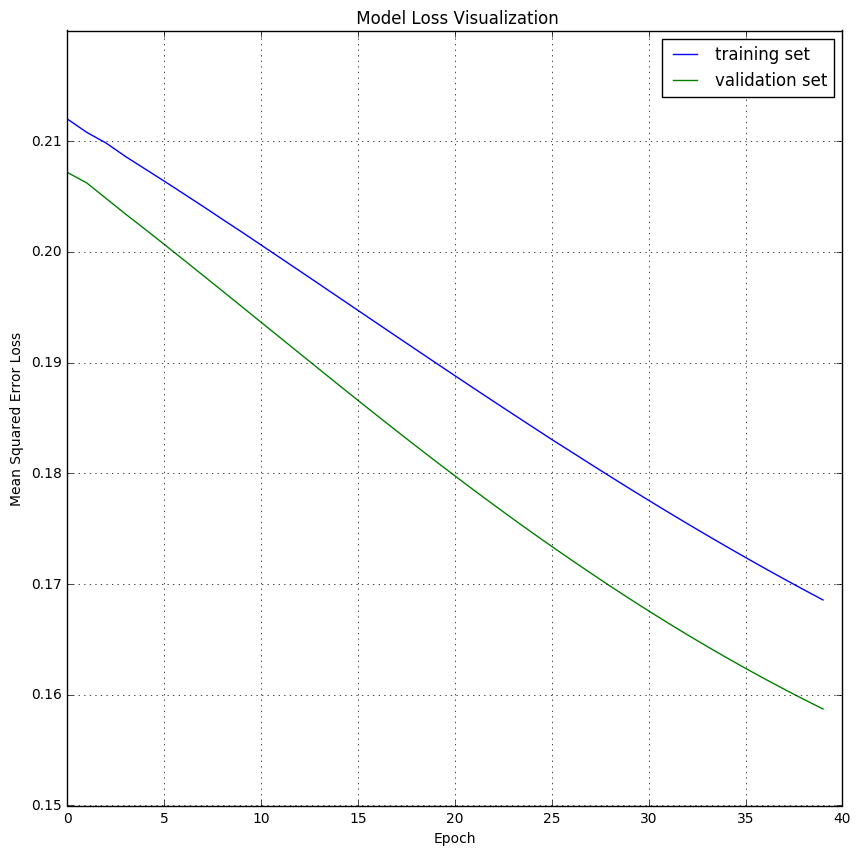

In [81]:
visualize_loss(history_object)

In [ ]:
#for increased in survived feature in 
#As Pclass is increased Survival rate is decreasing,,i.e for Pclass 3 there is less survival


In [23]:
train1.head(2)

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0


In [24]:
test1.head(2)

,Pclass,SibSp,Parch
0,3,0,0
1,3,1,0


In [28]:
train1_x=train1.drop(["Survived"],axis=1)
train1_x.tail() 
#tail is opposite of head. which show last data
#survival is dropped as we need to find it.



,Pclass,SibSp,Parch
886,2,0,0
887,1,0,0
888,3,1,2
889,1,0,0
890,3,0,0


In [29]:
type(train1_x) # if one column-> it gives dataframes

pandas.core.frame.DataFrame

In [30]:
#1.1featrures 1.2 Output
#2.1Area, stories, rooms 2.2 price
#here label is survived

train1_y = train1["Survived"]
train1_y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [31]:
#Random Forest
#if given right parameters, RF is multiple dicision network

from sklearn.ensemble import RandomForestClassifier

In [32]:
clf_rf = RandomForestClassifier(random_state = 12)
clf_rf.fit(train1_x, train1_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=12,
            verbose=0, warm_start=False)

In [33]:
clf_rf.score(train1_x, train1_y) #training accuracy

0.72166105499438837

In [36]:
predictions1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [37]:
predictions1 = clf_rf.predict(test1)

In [38]:
def kgl_submit_csv(df, predictions, savename = "my_predictions.csv", save=False):
    print("Number of predictions:", len(predictions))
    print("Number of passengers", len(df["PassengerId"]))
    
    kgl_df = pd.DataFrame({
        "PassengerId" : df["PassengerId"],
        "Survived" : predictions
    })
    
    if save:
        kgl_df.to_csv(savename, index=False)
    
    return kgl_df

In [39]:
a=kgl_submit_csv(test_df,predictions1,)

Number of predictions: 418
Number of passengers 418


In [41]:
a = kgl_submit_csv(test_df, predictions1, savename= "prediction_saved.csv", save=True)

Number of predictions: 418
Number of passengers 418


In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
